In [1]:
%load_ext autoreload
%autoreload 2

In [93]:
import numpy as np
import Chromatin3D
import sys
from Chromatin3D.data_generation.Uniform_Cluster_Walk import synthetic_biological_uniform_data_generator, generate_biological_structure
from Chromatin3D.Data_Tools.Data_Calculation import generate_hic, import_trussart_data, import_fission_yeast
from Chromatin3D.Data_Tools.Data_Plotting import plot_structure_in_sphere, plot_hic, plot_optimal_transport
from dotenv import load_dotenv
import os
load_dotenv() 
DATA_DIR = os.environ.get('DATA_DIR')
DATA_PATH=f'{DATA_DIR}/biological_trussart_uniform/'
NB_TRAINING = 800
NB_testing = 200
NB_BINS = 1258
DELTA = 0.45
ST_SIG = 5
END_SIG = 7
SIG = 4
CLUST_SIG = 1.5
CLUST_PROB = 0.1
SECONDSTEP = False
SEED = 42
EXPONENT = 1
ICING = True
MINMAXUSE= False
TRANSPORTATION = True
SOFTMAXING = False


In [90]:
synthetic_biological_structure = generate_biological_structure(nb_nodes = 1258, delta = 0.2, start_sigma= 5,
                                                               end_sigma = 7, sigma = 6, 
                                                               cluster_sigma=1, cluster_proba = 0.8, step2 = False)


In [91]:
plot_structure_in_sphere(synthetic_biological_structure)

In [94]:
fission_yeast_hic = import_fission_yeast(DATA_DIR)

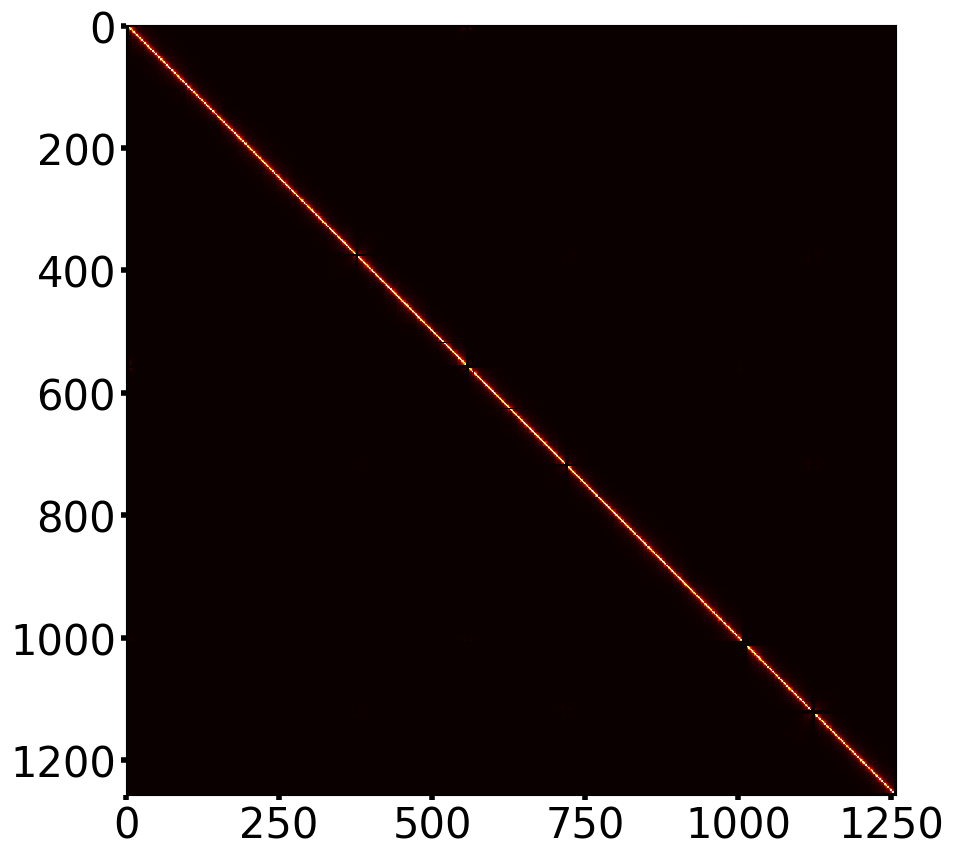

In [95]:
plot_hic(fission_yeast_hic)

In [105]:
new_hic = generate_hic(None, synthetic_biological_structure, fission_yeast_hic, use_ice =True, use_minmax =True, use_ot = False, use_softmax =True, seed =42, plot_optimal_transport =False, exponent =1)


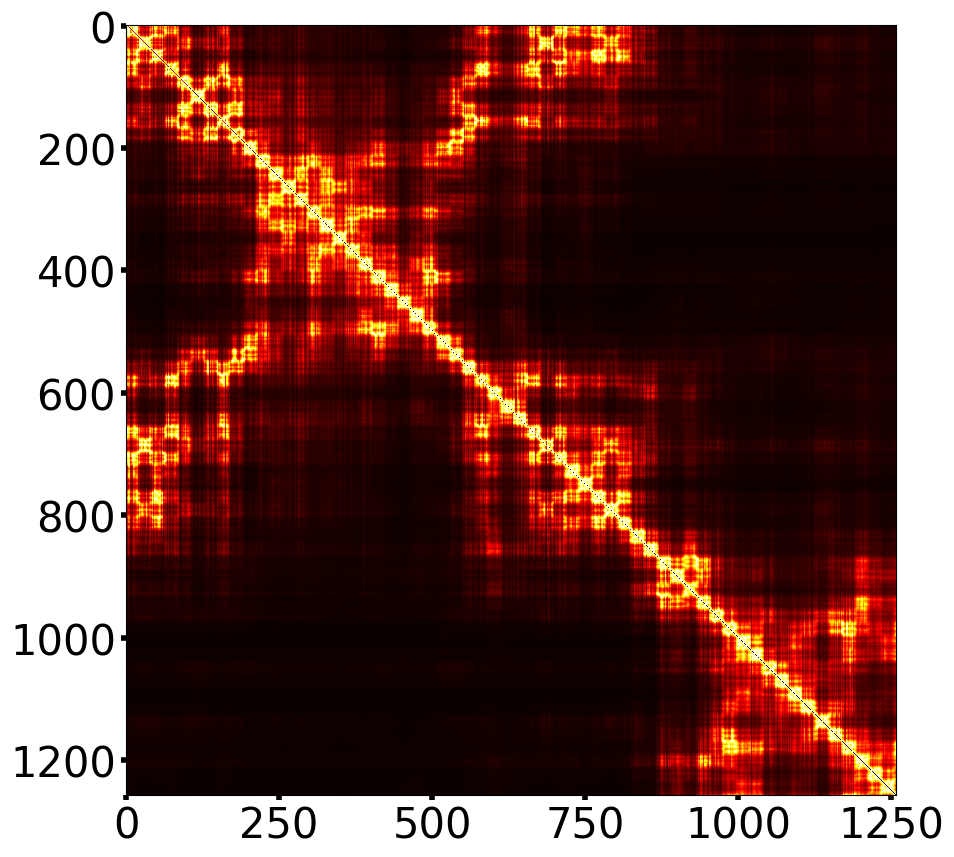

In [106]:
plot_hic(new_hic)

In [ ]:
new_hic = generate_hic(None, synthetic_biological_structure, fission_yeast_hic, use_ice =False, use_minmax =True, use_ot = False, use_softmax =False, seed =42, plot_optimal_transport =False, exponent =1)
plot_hic(new_hic)

In [ ]:
plot_hic(fission_yeast_hic)

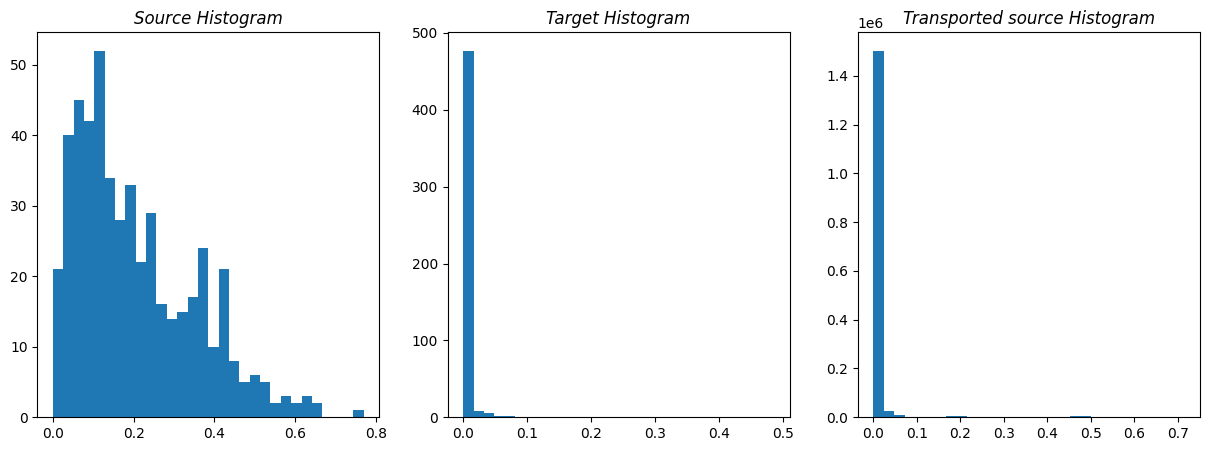

In [107]:

rng = np.random.RandomState(42)
#random.seed(seed)
#np.random.seed(seed)
new_hic, orig_hic, Xs, Xt = generate_hic(rng, synthetic_biological_structure, fission_yeast_hic, use_ice =True, use_minmax =False, use_ot = True, use_softmax =False, seed =42, plot_optimal_transport =True, exponent =1)

plot_optimal_transport(Xs, Xt, new_hic)

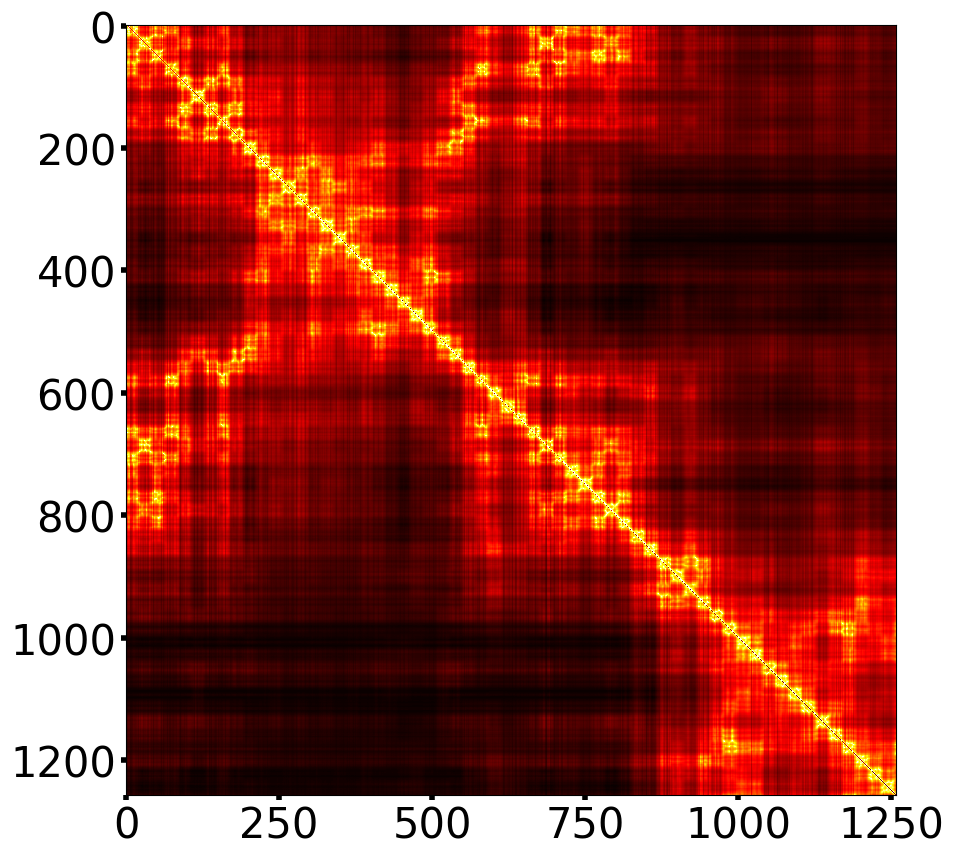

In [108]:
plot_hic(orig_hic)

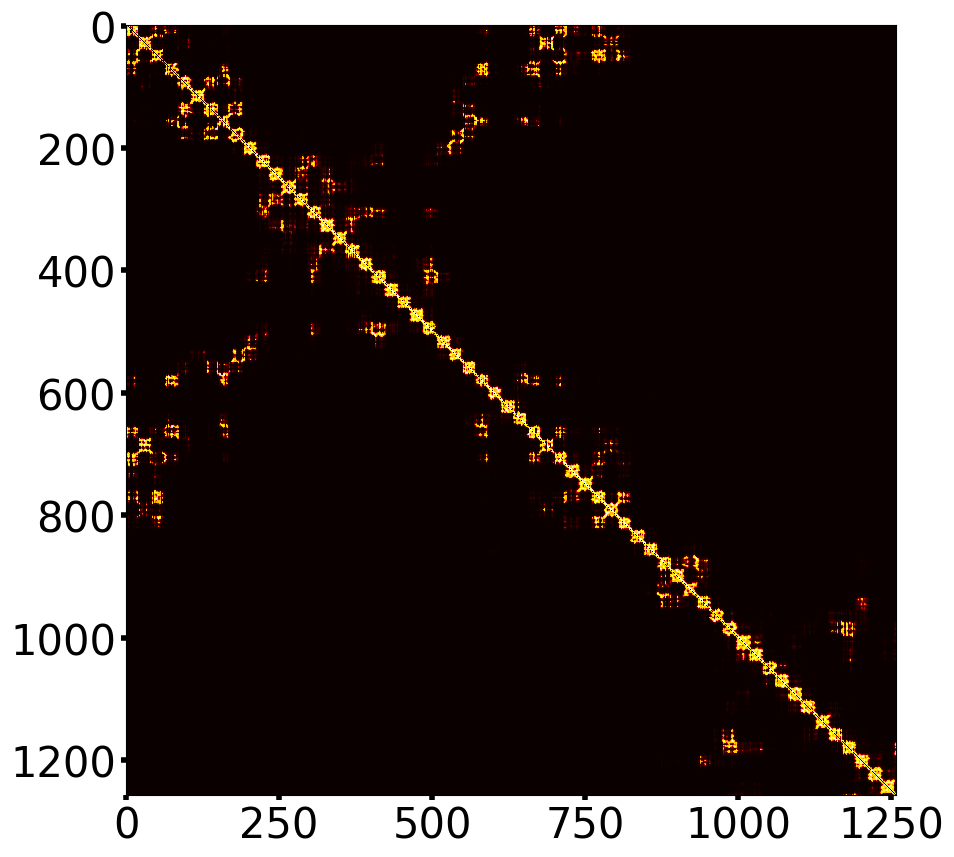

In [109]:
plot_hic(new_hic)